<a href="https://colab.research.google.com/github/umutcanc7/DSA210-PROJECT-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
        Date  Total Steps  Matchday   Time Score Result  IsMatchday
0 2024-07-22         4594     False    NaN   NaN    NaN           0
1 2024-07-23        11438      True  21:30   3:4    Win           1
2 2024-07-24         1762     False    NaN   NaN    NaN           0
3 2024-07-25         5515     False    NaN   NaN    NaN           0
4 2024-07-26         5829     False    NaN   NaN    NaN           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         171 non-null    datetime64[ns]
 1   Total Steps  171 non-null    int64         
 2   Matchday     171 non-null    bool          
 3   Time         27 non-null     object        
 4   Score        27 non-null     object        
 5   Result       27 non-null     object        
 6   IsMatchday   171 non-null    int64         
dtypes: bool(1), datetime64[ns

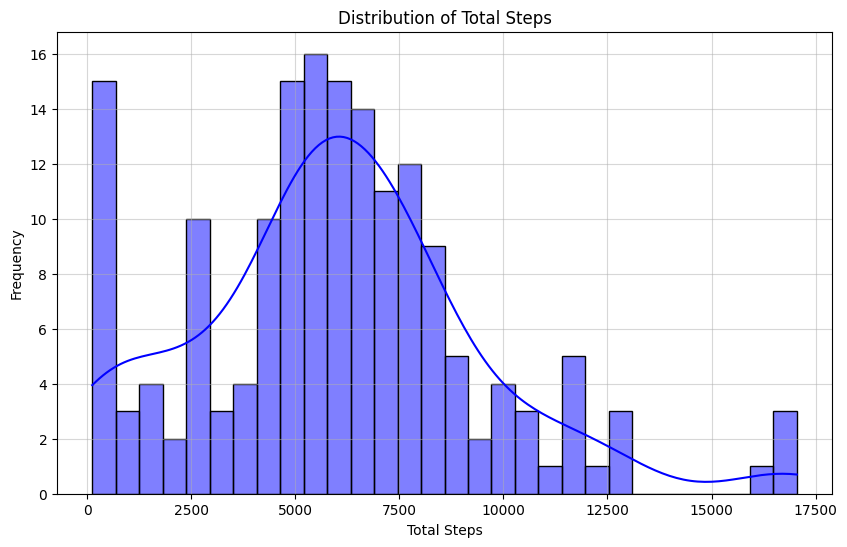

<ipython-input-3-446089905684>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsMatchday', y='Total Steps', data=combined_data, palette='Set2')


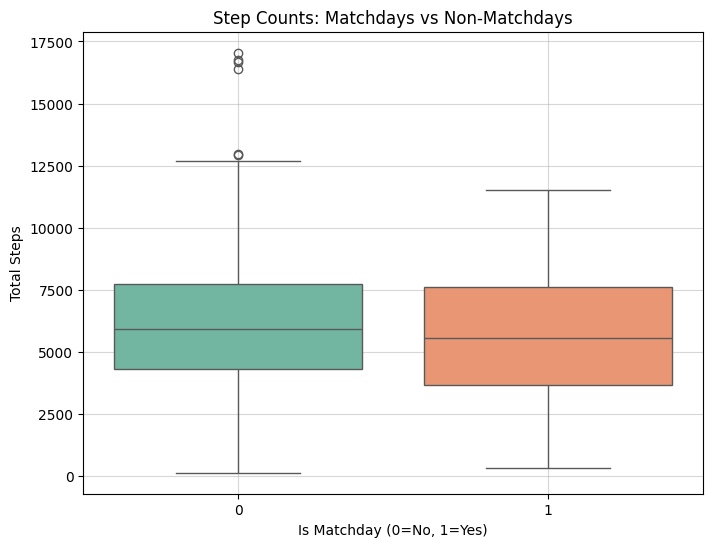

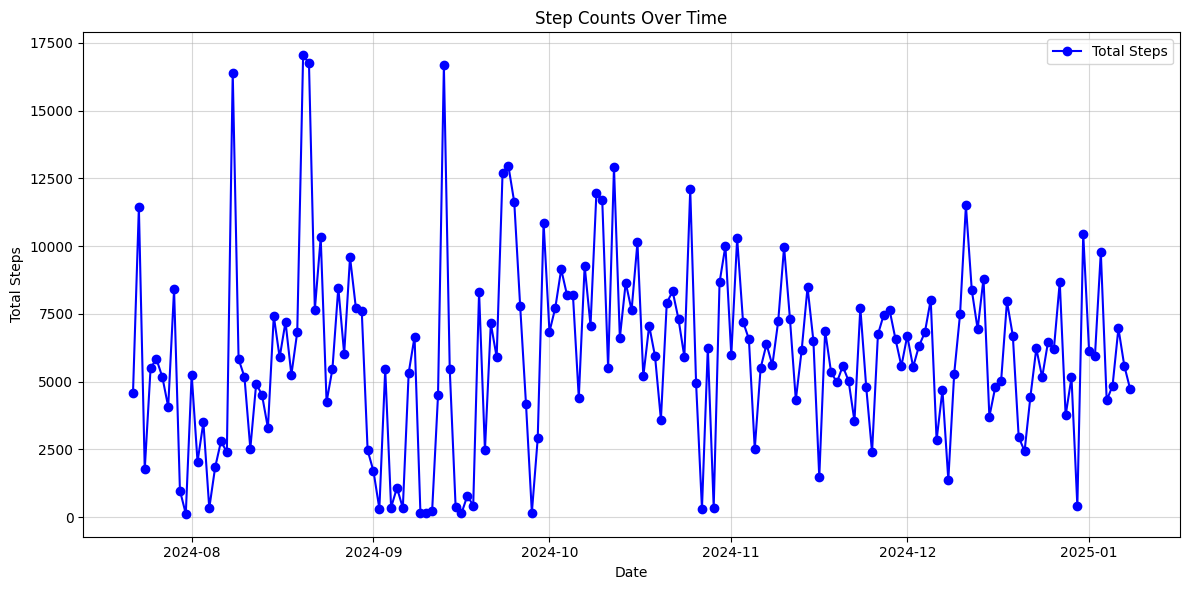

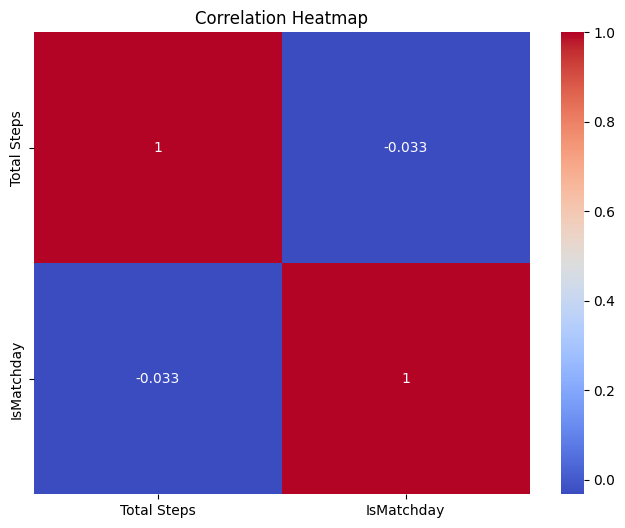

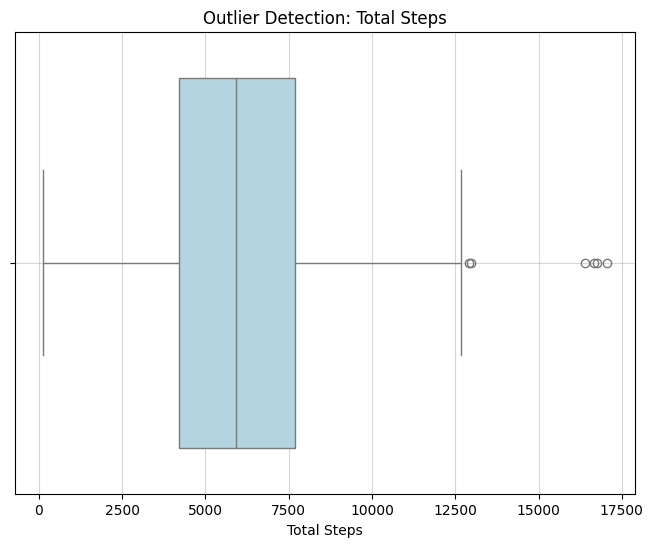

Step Counts Around Matchdays:
        Date  IsMatchday  Lag_Steps  Total Steps  Lead_Steps
0 2024-07-22           0        NaN         4594     11438.0
1 2024-07-23           1     4594.0        11438      1762.0
2 2024-07-24           0    11438.0         1762      5515.0
3 2024-07-25           0     1762.0         5515      5829.0
4 2024-07-26           0     5515.0         5829      5172.0


In [3]:
# Exploratory Data Analysis (EDA) for Step Counts and Matchday Data

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

step_data = pd.read_csv(step_count_file)
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add binary column for matchdays
combined_data['IsMatchday'] = combined_data['Matchday'].astype(int)

# Drop rows with missing values
combined_data = combined_data.dropna(subset=['Total Steps', 'IsMatchday'])

# Preview the dataset
print("Dataset Preview:")
print(combined_data.head())
print(combined_data.info())
print("Summary Statistics:")
print(combined_data.describe())

# Check for missing values
print("Missing Values:")
print(combined_data.isnull().sum())

# Group-wise Statistics
print("Group-wise Statistics (Matchday vs Non-Matchday):")
print(combined_data.groupby('IsMatchday')['Total Steps'].describe())

# Visualizations
## Distribution of Total Steps
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Total Steps'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.show()

## Step Counts by Matchdays (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsMatchday', y='Total Steps', data=combined_data, palette='Set2')
plt.title('Step Counts: Matchdays vs Non-Matchdays')
plt.xlabel('Is Matchday (0=No, 1=Yes)')
plt.ylabel('Total Steps')
plt.grid(alpha=0.5)
plt.show()

## Step Counts Over Time
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Total Steps'], label='Total Steps', marker='o', color='blue', linestyle='-')
plt.title('Step Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## Correlation Heatmap
correlation_matrix = combined_data[['Total Steps', 'IsMatchday']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Outlier Detection (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_data['Total Steps'], color='lightblue')
plt.title('Outlier Detection: Total Steps')
plt.xlabel('Total Steps')
plt.grid(alpha=0.5)
plt.show()

# Trends Around Matchdays
combined_data['Lag_Steps'] = combined_data['Total Steps'].shift(1)
combined_data['Lead_Steps'] = combined_data['Total Steps'].shift(-1)
print("Step Counts Around Matchdays:")
print(combined_data[['Date', 'IsMatchday', 'Lag_Steps', 'Total Steps', 'Lead_Steps']].head())
